#Importing the basic necessities

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import operator
from google.colab import files 
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px


#Importing the files

In [ ]:
data_december = pd.read_csv("https://raw.githubusercontent.com/seaportai1/retail/main/2019-dec.csv")

In [ ]:
data_december.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [ ]:
data_october = pd.read_csv("https://github.com/seaportai1/retail/blob/main/2019-oct.csv?raw=true")
data_october.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [ ]:
data_november = pd.read_csv("https://github.com/seaportai1/retail/blob/main/2019-nov.csv?raw=true")
data_november.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-11-01 00:00:02 UTC,view,5802432.0,1.487580e+18,NaN,NaN,0.32,562076640.0,09fafd6c-6c99-46b1-834f-33527f4de241
1,1,2019-11-01 00:00:09 UTC,cart,5844397.0,1.487580e+18,NaN,NaN,2.38,553329724.0,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2,2019-11-01 00:00:10 UTC,view,5837166.0,1.783999e+18,NaN,pnb,22.22,556138645.0,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,3,2019-11-01 00:00:11 UTC,cart,5876812.0,1.487580e+18,NaN,jessnail,3.16,564506666.0,186c1951-8052-4b37-adce-dd9644b1d5f7
4,4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182.0,1.487580e+18,NaN,NaN,3.33,553329724.0,2067216c-31b5-455d-a1cc-af0575a34ffb


#Understanding the Data and Cleaning it

In [ ]:
print(data_october.shape)
print(data_november.shape)
print(data_december.shape)

(22283, 10)
(20077, 10)
(20286, 10)


In [ ]:
data_tables = [data_october,data_november,data_december]

In [ ]:
list(data_tables[0].columns)

['Unnamed: 0',
 'event_time',
 'event_type',
 'product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
 'user_id',
 'user_session']

In [ ]:
data_tables[0].nunique()

Unnamed: 0       22283
event_time       12356
event_type           4
product_id        8149
category_id        392
category_code        9
brand              169
price              907
user_id           3270
user_session      4553
dtype: int64

In [ ]:
data_tables[0]['category_code'].unique()

array([nan, 'appliances.environment.vacuum', 'stationery.cartrige',
       'apparel.glove', 'accessories.bag',
       'furniture.living_room.cabinet', 'furniture.bathroom.bath',
       'appliances.personal.hair_cutter', 'accessories.cosmetic_bag',
       'appliances.environment.air_conditioner'], dtype=object)

In [ ]:
data_tables[0]['event_type'].unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

In [ ]:
data_tables[0].describe()

,Unnamed: 0,product_id,category_id,price,user_id
count,2.228300e+04,2.228300e+04,2.228300e+04,22283.000000,2.228300e+04
mean,4.291565e+05,5.482830e+06,1.545258e+18,8.640314,4.886755e+08
std,1.240660e+06,1.294428e+06,1.602047e+17,18.851746,8.853571e+07
min,0.000000e+00,3.762000e+03,1.487580e+18,0.000000,9.794320e+06
25%,5.570500e+03,5.723521e+06,1.487580e+18,2.060000,4.464193e+08
50%,1.114100e+04,5.808304e+06,1.487580e+18,3.970000,5.267042e+08
75%,1.671150e+04,5.848909e+06,1.487580e+18,7.460000,5.546601e+08
max,4.102282e+06,5.900470e+06,2.195085e+18,299.810000,5.662808e+08


In [ ]:
for _ in range(3):
  print('----------------------------')
  print(data_tables[_].isnull().sum())

----------------------------
Unnamed: 0           0
event_time           0
event_type           0
product_id           0
category_id          0
category_code    21732
brand             8970
price                0
user_id              0
user_session         0
dtype: int64
----------------------------
Unnamed: 0           0
event_time           0
event_type           1
product_id           1
category_id          1
category_code    19707
brand             7987
price                1
user_id              1
user_session        15
dtype: int64
----------------------------
Unnamed: 0           0
event_time           0
event_type           0
product_id           0
category_id          0
category_code    19956
brand             8523
price                0
user_id              0
user_session        10
dtype: int64


In [ ]:
for _ in range(3):
  data_tables[_].replace([np.nan],'not known',inplace=True)

In [ ]:
for _ in range(3):
  print('----------------------------')
  print(data_tables[_].isnull().sum())

----------------------------
Unnamed: 0       0
event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64
----------------------------
Unnamed: 0       0
event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64
----------------------------
Unnamed: 0       0
event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


#Exploring the Data and looking at monthwise trends

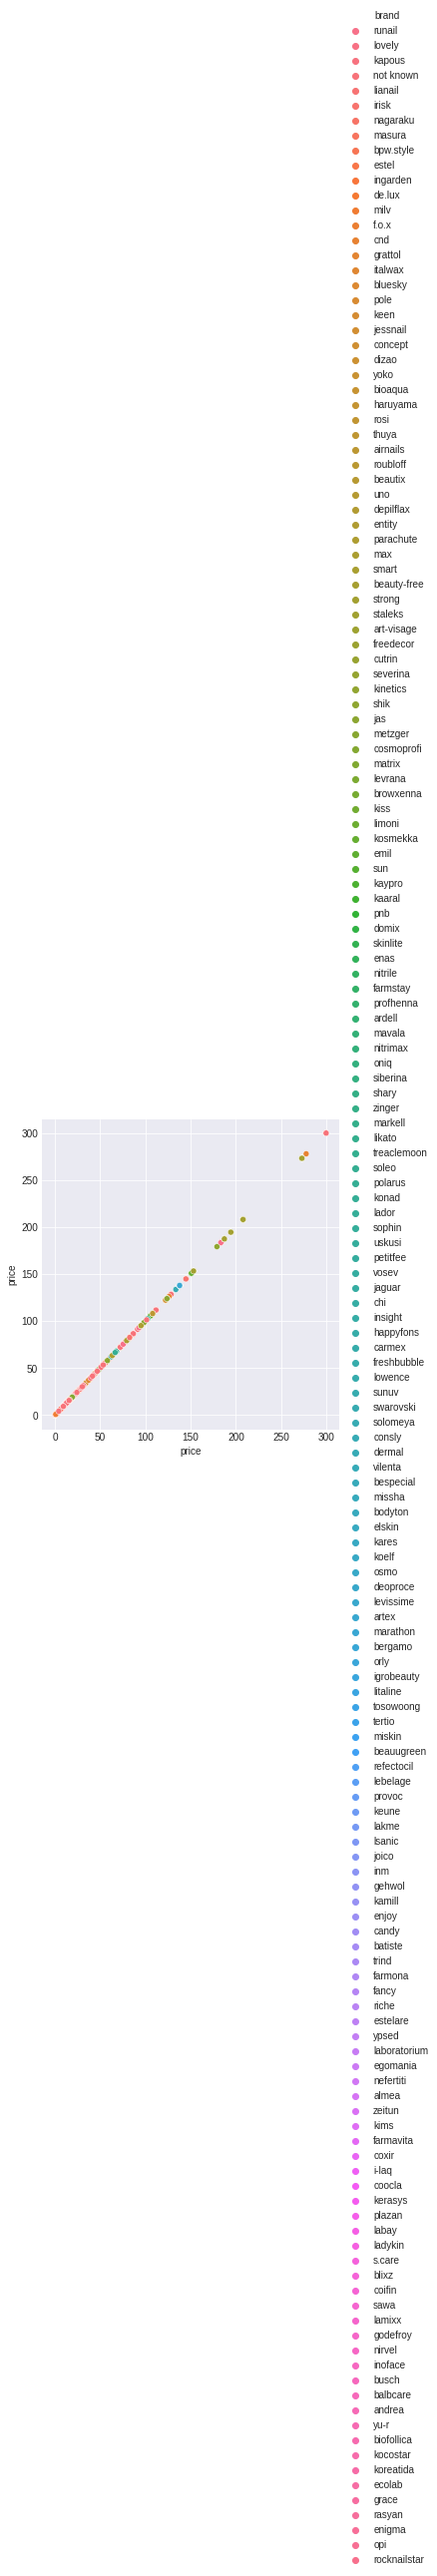

In [ ]:
sns.relplot(x='price',y='price',hue='brand',data=data_tables[0])

Red shaded brands are cheaper

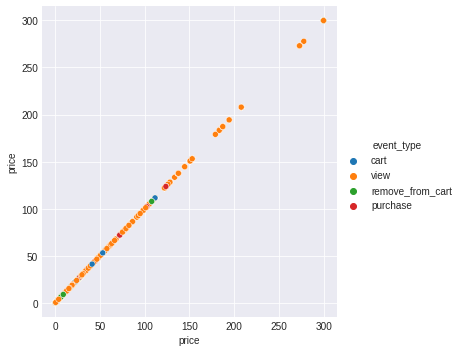

In [ ]:
sns.relplot(x='price',y='price',hue='event_type',data=data_tables[0])

In [ ]:
months = ['October','November','December']

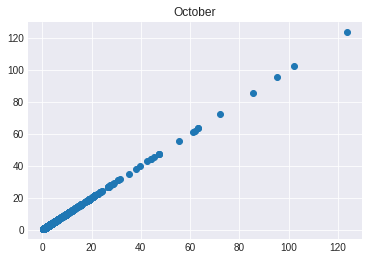

Total Purchases in October were 1722 with mean price 5.263042973286876 and standard deviation 8.088440574107693 


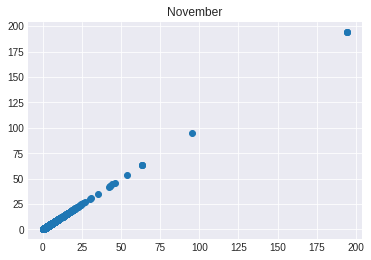

Total Purchases in November were 1401 with mean price 5.140314061384725 and standard deviation 10.845862946033947 


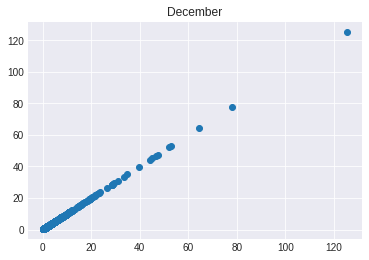

Total Purchases in December were 1346 with mean price 4.421367013372957 and standard deviation 6.793078496035883 


In [ ]:
for _ in range(3):
  data_temp = data_tables[_][data_tables[_]['event_type']=='purchase']
  plt.scatter(data_temp['price'],data_temp['price'])
  plt.title(months[_])
  plt.show()
  mean = data_temp['price'].mean()
  std = data_temp['price'].std()
  print(f'Total Purchases in {months[_]} were {len(data_temp)} with mean price {mean} and standard deviation {std} ')


In all three months, most purchased goods were in the range 0-25  

In [ ]:
data_tables[0].head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,not known,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,not known,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,not known,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,not known,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,not known,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [ ]:
# Top selling brand

sales = [{},{},{}]
cost_sales = [{},{},{}]
for _ in range(3):
  data_tempr = data_tables[_][data_tables[_]['event_type']=='purchase']
  for brand_name in list(data_tempr['brand'].unique()): 

    temp = len(data_tempr[data_tempr['brand']==brand_name])

    sales[_][brand_name]=temp
    cost_sales[_][brand_name] = data_tempr[data_tempr['brand']==brand_name]['price'].sum()
    print(f'Sales of the brand {brand_name} in the month {months[_]} are {temp} ' )

  sales[_] = dict( sorted(sales[_].items(), key=operator.itemgetter(1),reverse=True))
  cost_sales[_] = dict( sorted(cost_sales[_].items(), key=operator.itemgetter(1),reverse=True))


Sales of the brand runail in the month October are 343 
Sales of the brand not known in the month October are 629 
Sales of the brand irisk in the month October are 89 
Sales of the brand bluesky in the month October are 47 
Sales of the brand bpw.style in the month October are 51 
Sales of the brand art-visage in the month October are 5 
Sales of the brand milv in the month October are 27 
Sales of the brand freedecor in the month October are 18 
Sales of the brand cutrin in the month October are 1 
Sales of the brand airnails in the month October are 4 
Sales of the brand severina in the month October are 6 
Sales of the brand uno in the month October are 37 
Sales of the brand pole in the month October are 9 
Sales of the brand kapous in the month October are 7 
Sales of the brand cnd in the month October are 9 
Sales of the brand yoko in the month October are 12 
Sales of the brand entity in the month October are 2 
Sales of the brand smart in the month October are 4 
Sales of the 

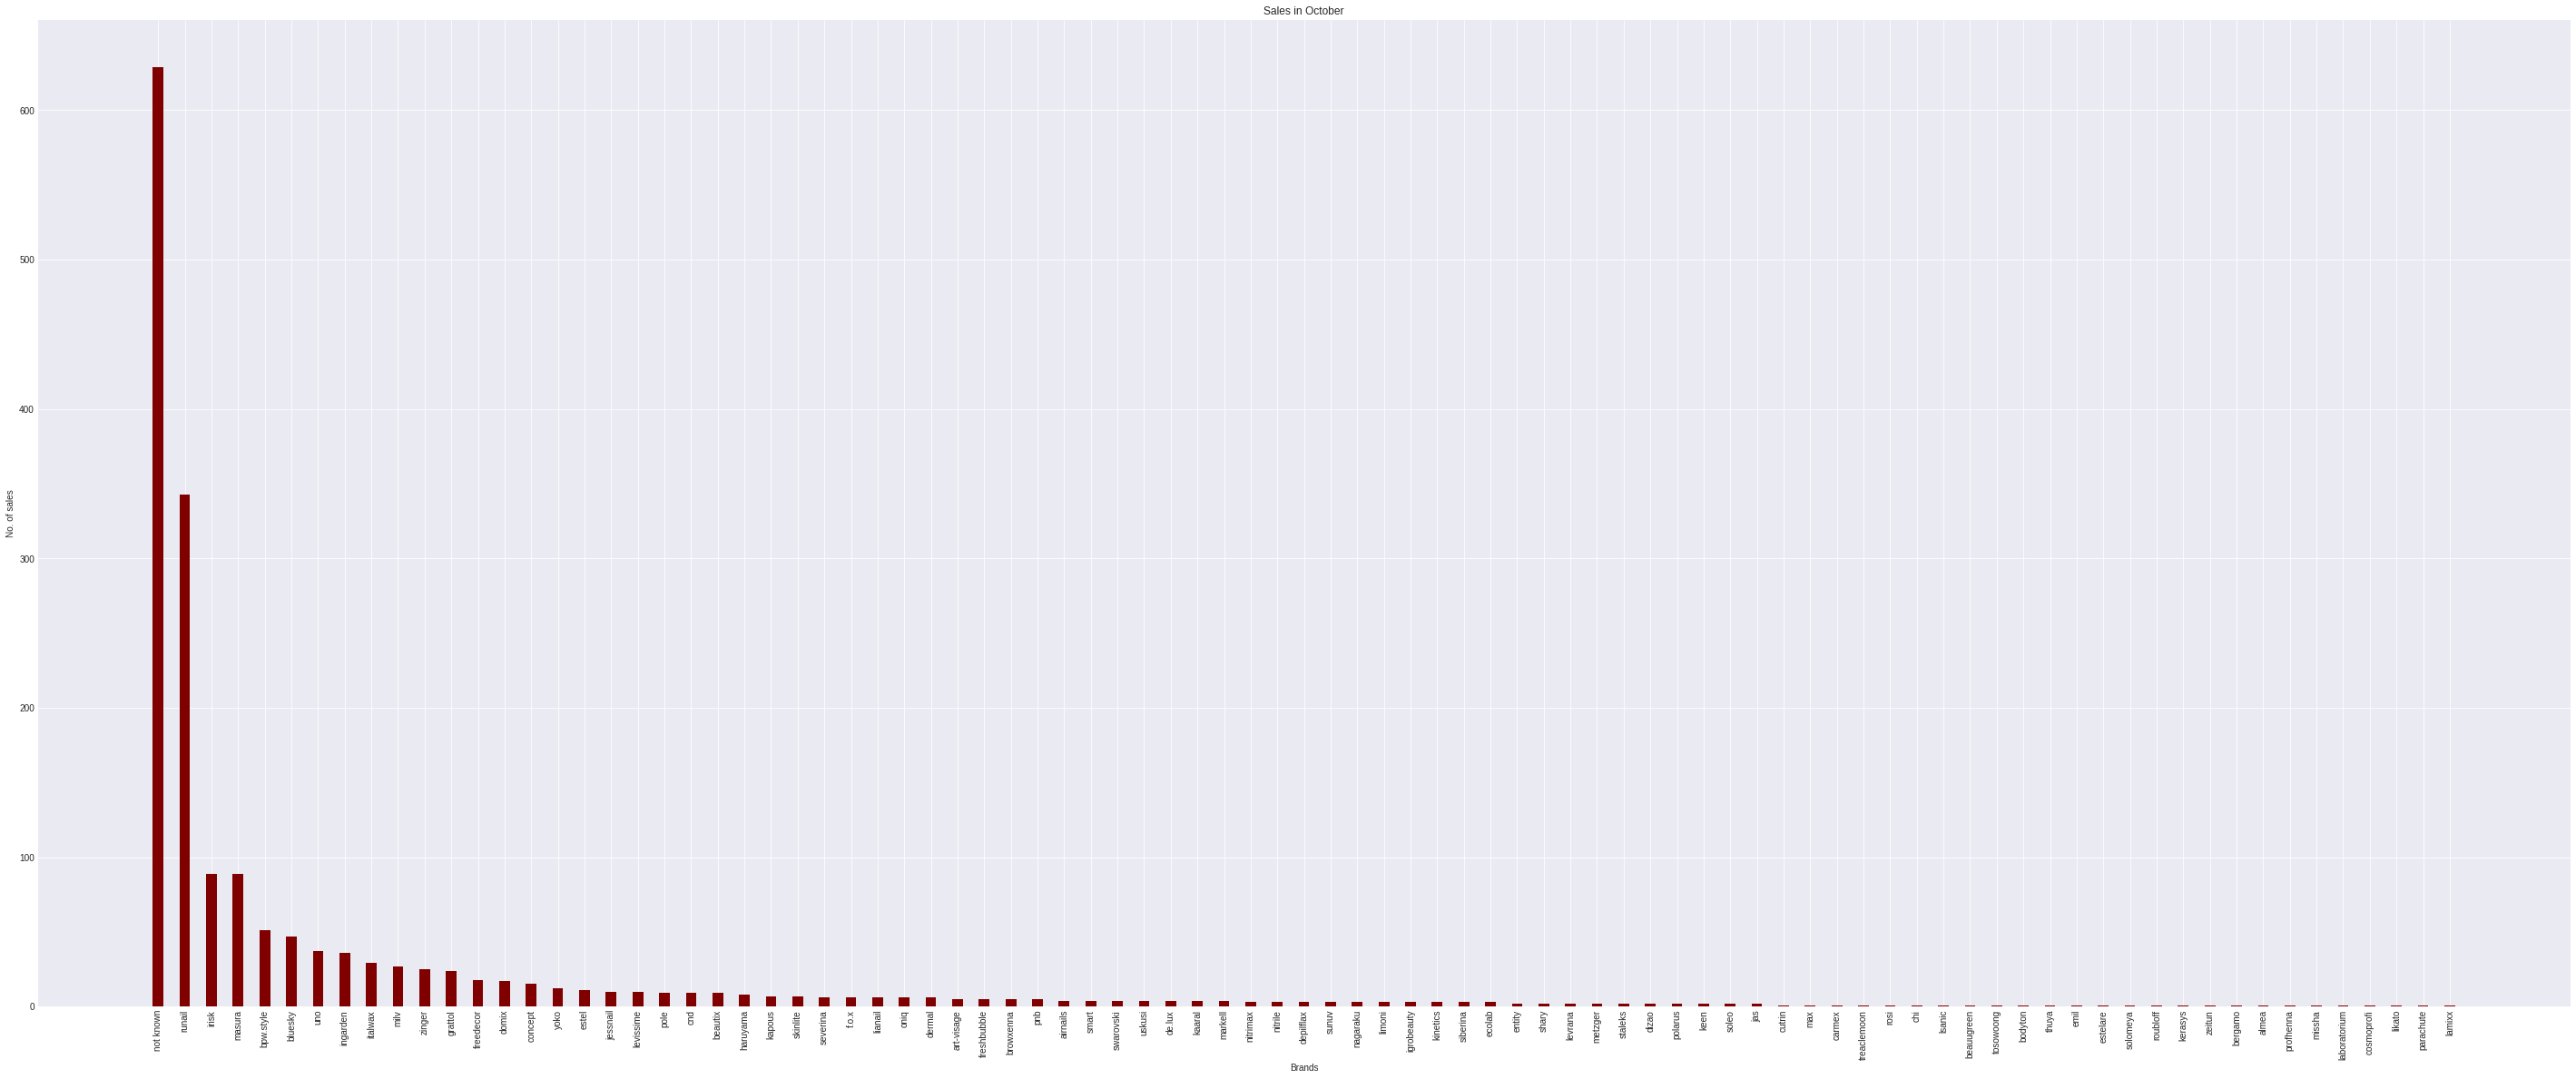

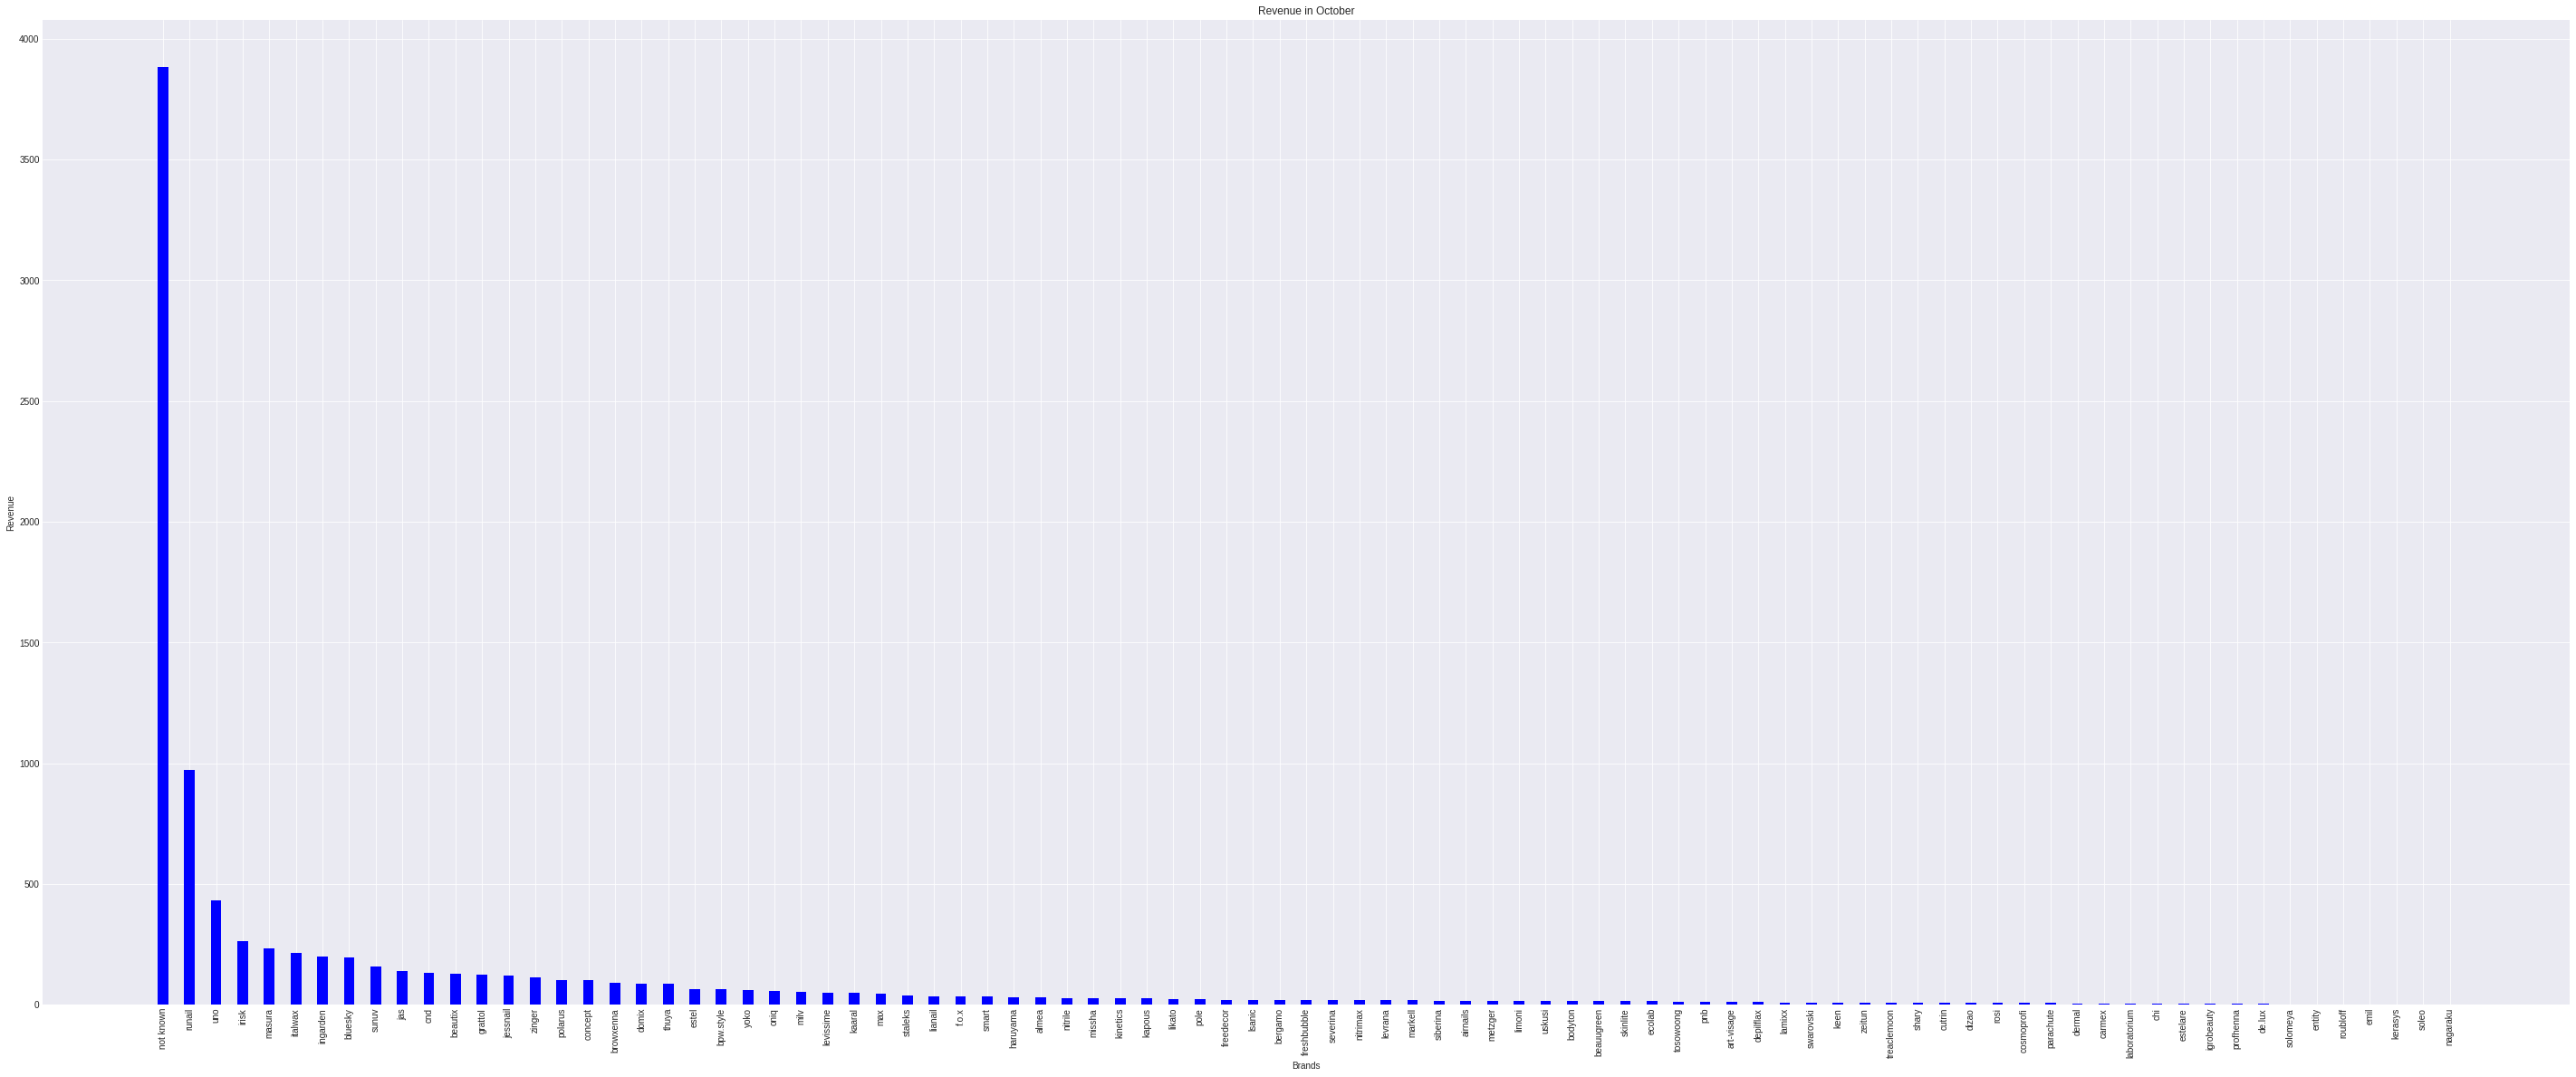

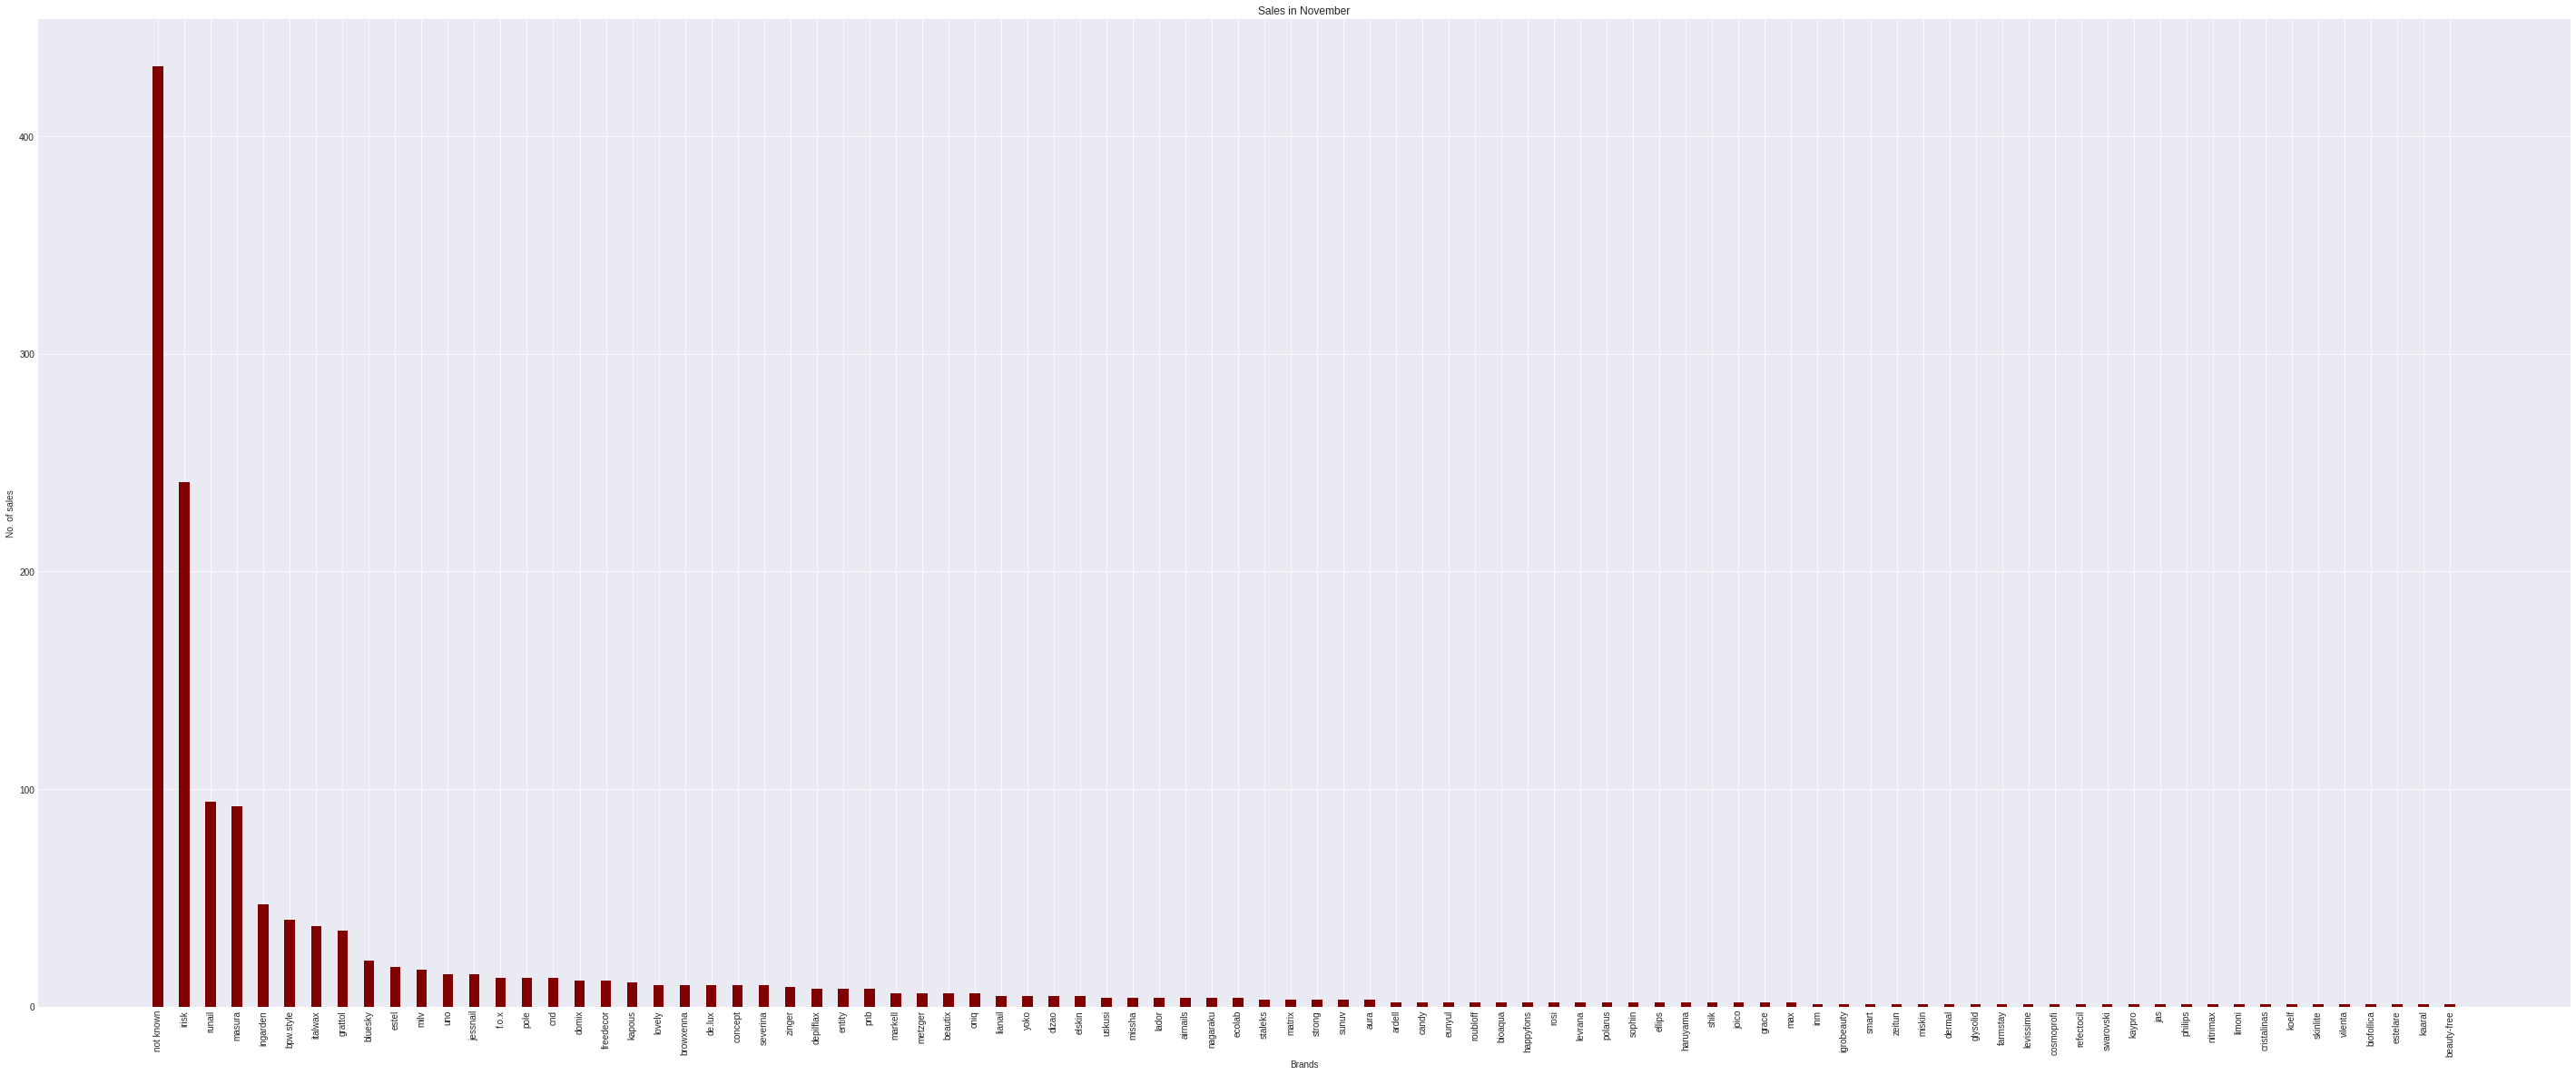

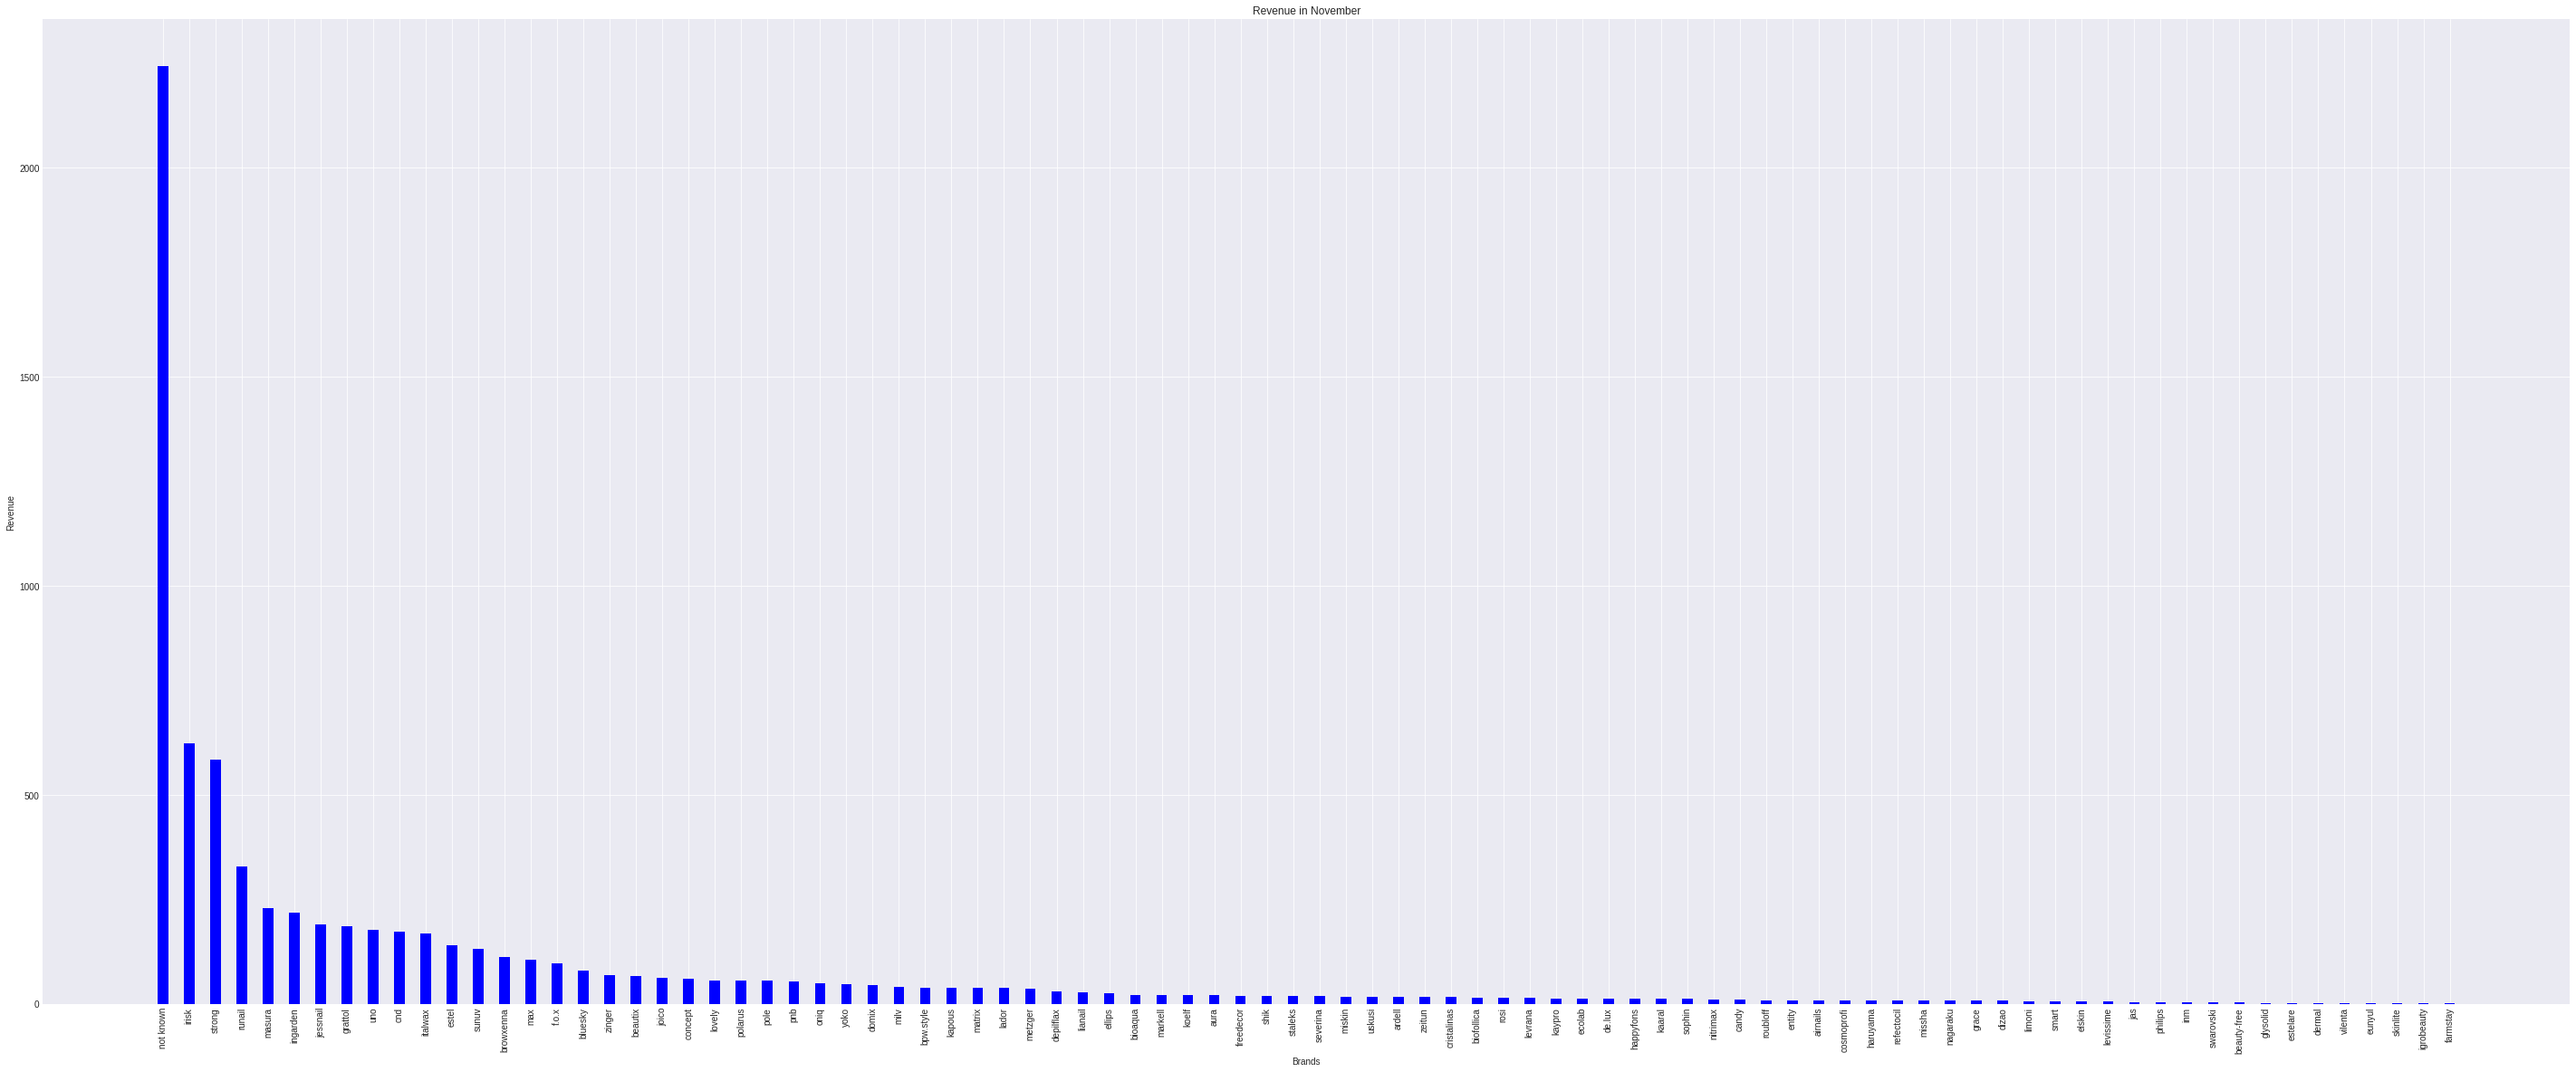

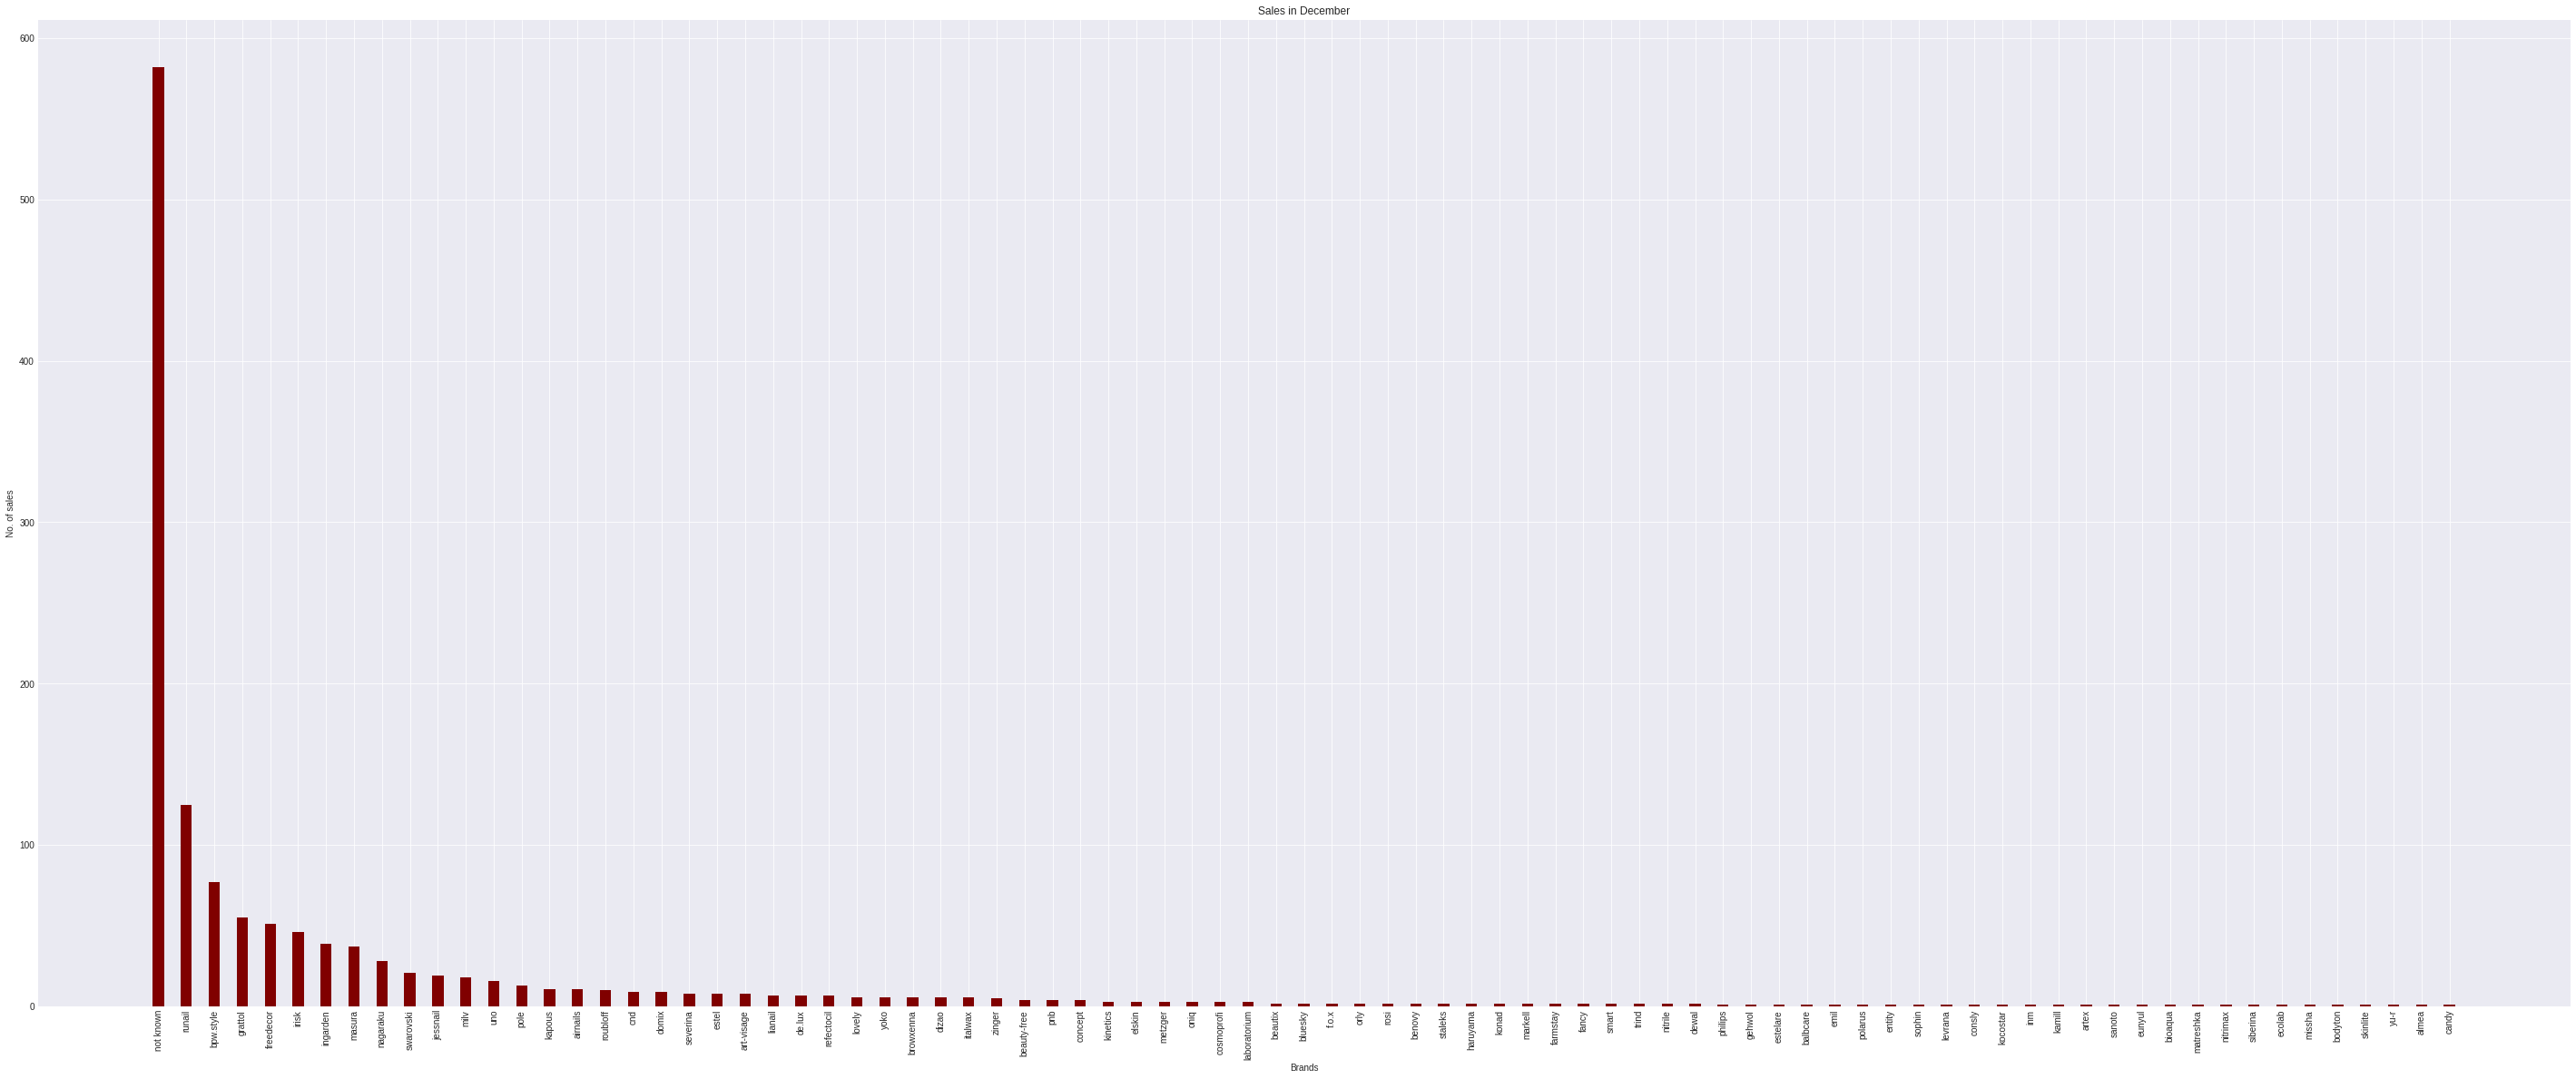

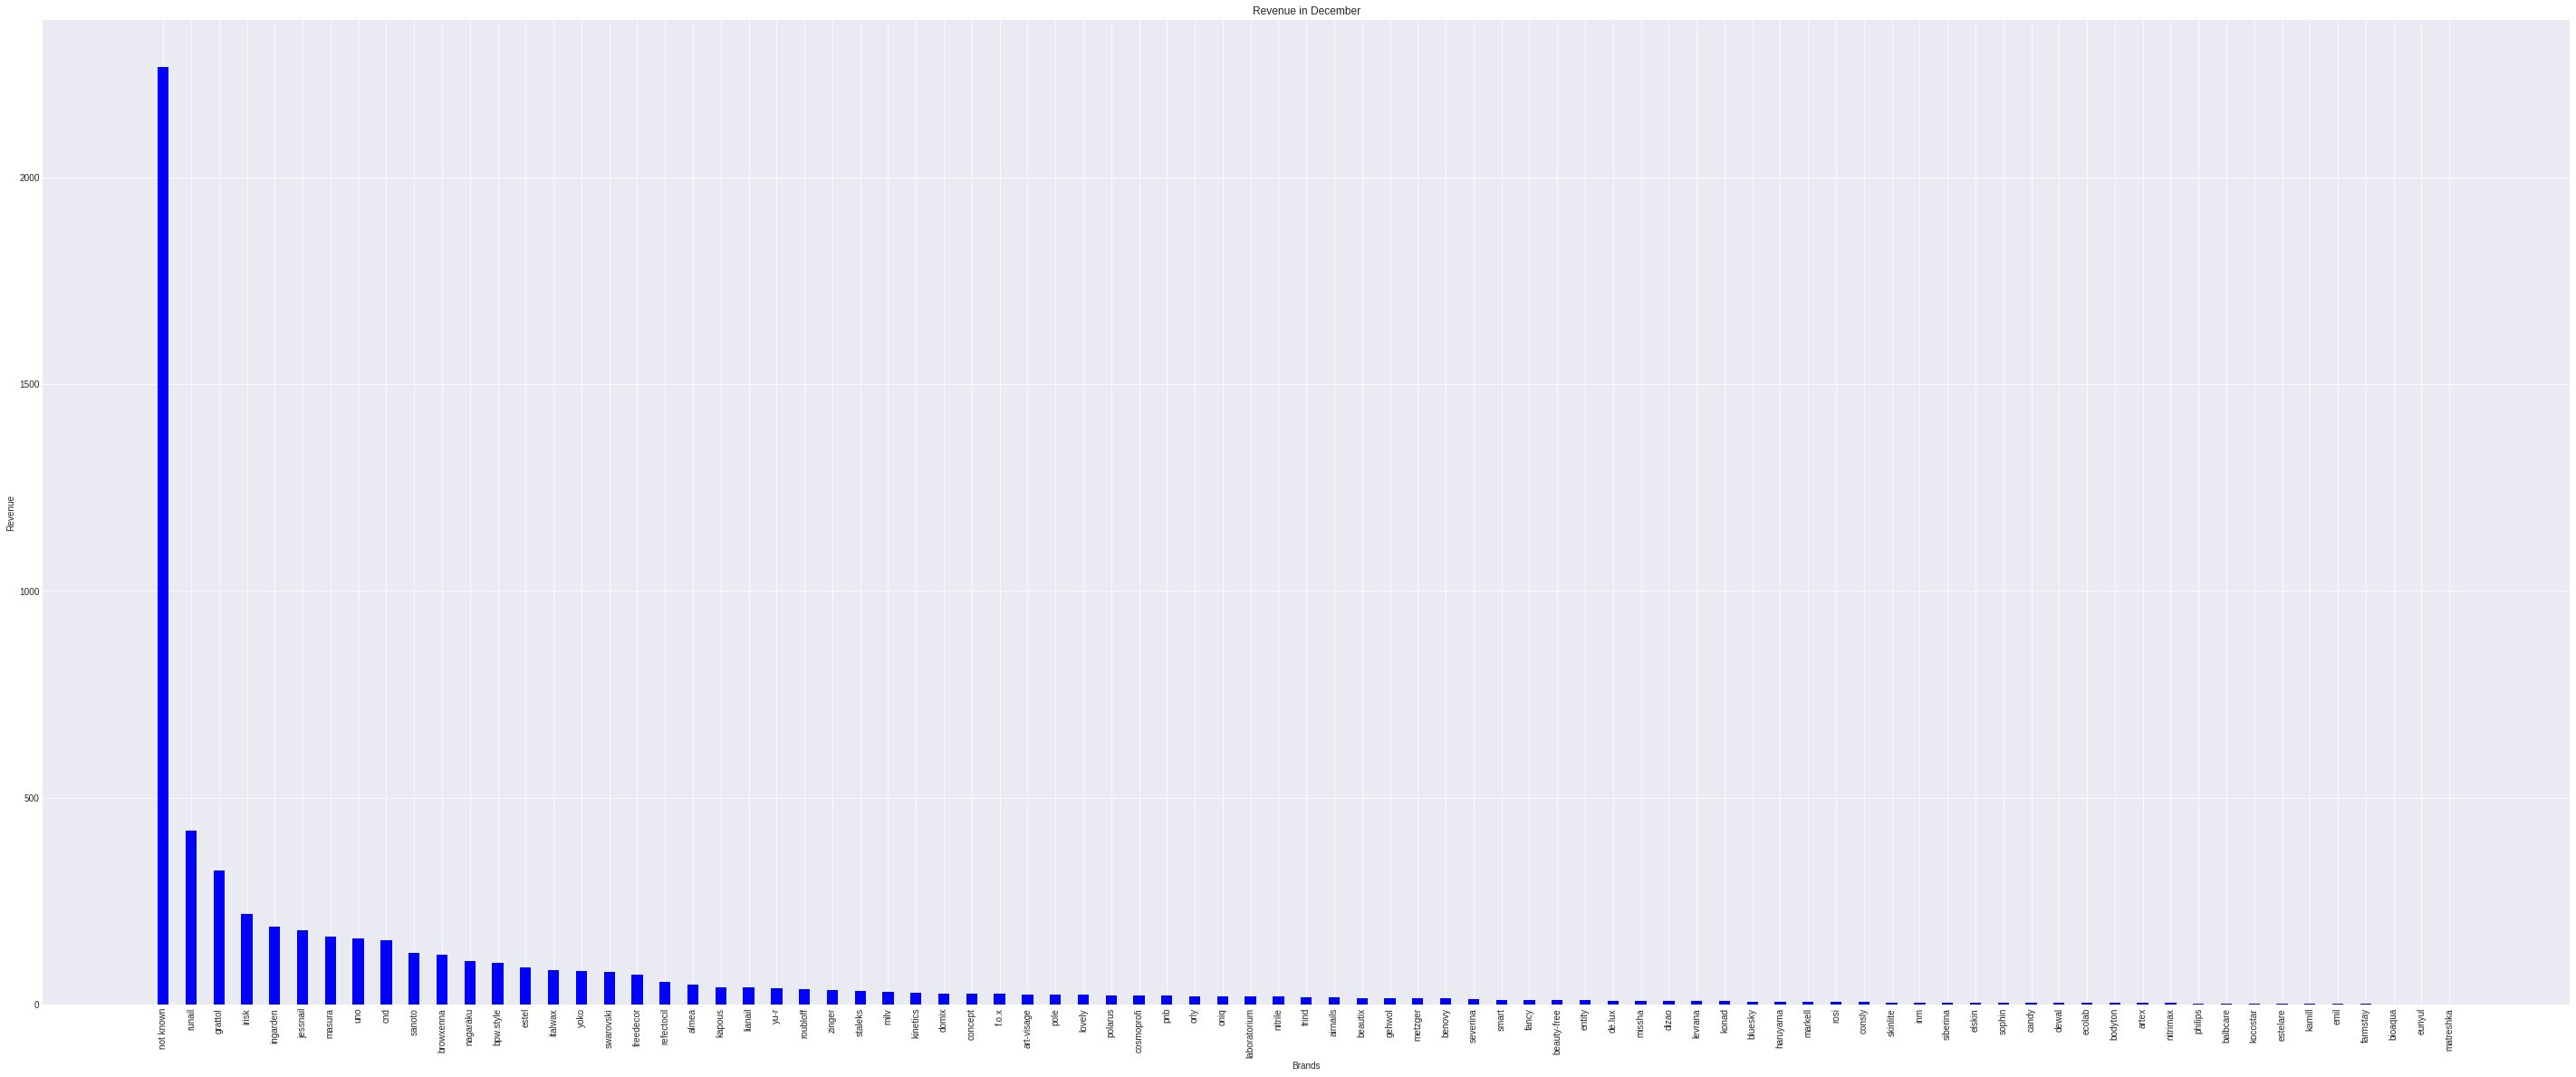

In [ ]:
for _ in range(3):
  fig = plt.figure(figsize = (50, 20))
 
# creating the bar plot
  plt.bar(list(sales[_].keys()), list(sales[_].values()), color ='maroon',
          width = 0.4)
 
  plt.xlabel("Brands")
  plt.ylabel("No. of sales")
  plt.title(f"Sales in {months[_]}")
  plt.xticks(rotation=90)
  plt.show()
  fig = plt.figure(figsize = (50, 20))
  plt.bar(list(cost_sales[_].keys()), list(cost_sales[_].values()), color ='blue',
          width = 0.4)
  plt.xlabel("Brands")
  plt.ylabel("Revenue")
  plt.title(f"Revenue in {months[_]}")
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
for _ in range(3):
  print(f'The top 5 bestselling brands in {months[_]} were')
  for i in range(5):
    print(f'{i+1}. {list(sales[_].keys())[i+1]} with {list(sales[_].values())[i+1]} total sales')
  print('-----------------------------')




The top 5 bestselling brands in October were
1. runail with 343 total sales
2. irisk with 89 total sales
3. masura with 89 total sales
4. bpw.style with 51 total sales
5. bluesky with 47 total sales
-----------------------------
The top 5 bestselling brands in November were
1. irisk with 241 total sales
2. runail with 94 total sales
3. masura with 92 total sales
4. ingarden with 47 total sales
5. bpw.style with 40 total sales
-----------------------------
The top 5 bestselling brands in December were
1. runail with 125 total sales
2. bpw.style with 77 total sales
3. grattol with 55 total sales
4. freedecor with 51 total sales
5. irisk with 46 total sales
-----------------------------


In [ ]:
total_sales = sum(sales[0].values()) + sum(sales[1].values()) + sum(sales[2].values()) 
print(f'The total sales in the three months combined were {total_sales}')
for _ in range(3):  
  print(f'The total sales in {months[_]} were {sum(sales[_].values())}.')

The total sales in the three months combined were 4469
The total sales in October were 1722.
The total sales in November were 1401.
The total sales in December were 1346.


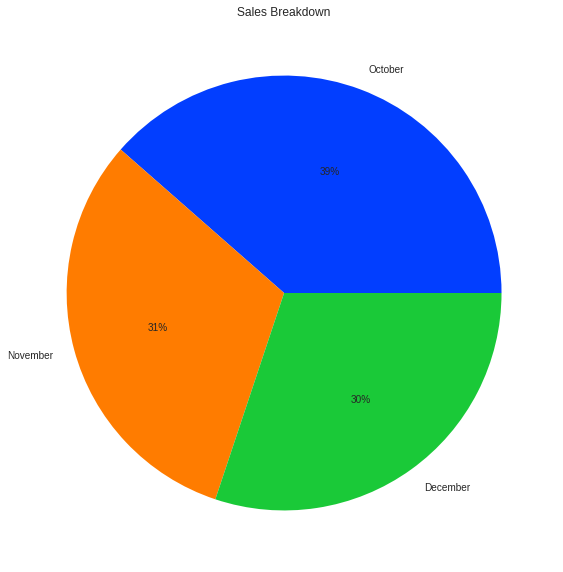

In [ ]:
sale_data = []
sale_data.append(sum(sales[0].values())/total_sales*100)
sale_data.append(sum(sales[1].values())/total_sales*100)
sale_data.append(sum(sales[2].values())/total_sales*100)
palette_color = sns.color_palette('bright')
fig = plt.figure(figsize = (10, 10))
plt.pie(sale_data, labels=months, colors=palette_color, autopct='%.0f%%')
plt.title("Sales Breakdown")
plt.show()

In [ ]:
total_revenue = sum(cost_sales[0].values()) + sum(cost_sales[1].values()) + sum(cost_sales[2].values()) 
print(f'The total revenue generated in the three months combined was {total_revenue}')
for _ in range(3):  
  print(f'The total revenue in {months[_]} was {sum(cost_sales[_].values())}.')

The total revenue generated in the three months combined was 22215.700000000004
The total revenue in October was 9062.960000000001.
The total revenue in November was 7201.580000000003.
The total revenue in December was 5951.160000000002.


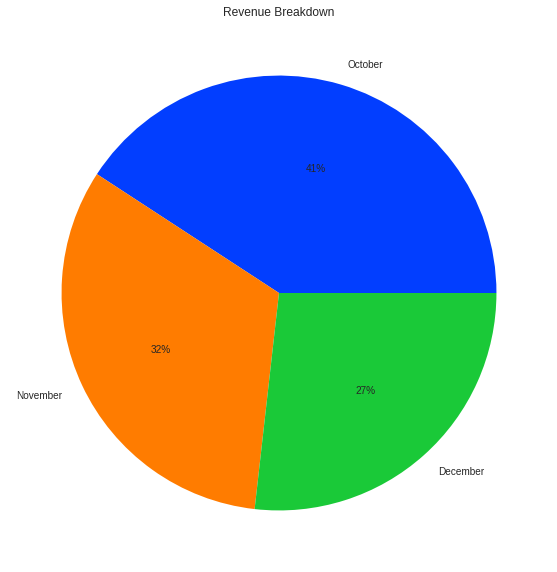

In [ ]:
cost_sale_data = []
cost_sale_data.append(sum(cost_sales[0].values())/total_revenue*100)
cost_sale_data.append(sum(cost_sales[1].values())/total_revenue*100)
cost_sale_data.append(sum(cost_sales[2].values())/total_revenue*100)
palette_color = sns.color_palette('bright')
fig = plt.figure(figsize = (10, 10))
plt.pie(cost_sale_data, labels=months, colors=palette_color, autopct='%.0f%%')
plt.title("Revenue Breakdown")
plt.show()

In [ ]:
for _ in range(3):
  print(f'The top 5 best revenue generating brands in {months[_]} were')
  for i in range(5):
    print(f'{i+1}. {list(cost_sales[_].keys())[i+1]} with {list(cost_sales[_].values())[i+1]} total revenue')
  print('-----------------------------')

The top 5 best revenue generating brands in October were
1. runail with 971.1199999999999 total revenue
2. uno with 433.56999999999994 total revenue
3. irisk with 261.77 total revenue
4. masura with 232.5 total revenue
5. italwax with 214.12 total revenue
-----------------------------
The top 5 best revenue generating brands in November were
1. irisk with 623.720000000001 total revenue
2. strong with 583.3199999999999 total revenue
3. runail with 327.48 total revenue
4. masura with 227.64 total revenue
5. ingarden with 216.92000000000002 total revenue
-----------------------------
The top 5 best revenue generating brands in December were
1. runail with 421.56 total revenue
2. grattol with 325.47999999999996 total revenue
3. irisk with 219.63 total revenue
4. ingarden with 188.53 total revenue
5. jessnail with 180.2 total revenue
-----------------------------


#Combining The Data of the Three Months




In [ ]:
data_entire = data_tables[0].append(data_tables[1],ignore_index=True)
data_entire = data_entire.append(data_tables[2],ignore_index=True)
data_entire.shape

(62646, 10)

In [ ]:
from google.colab import files
data_entire.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Exploring the Entire Data

In [ ]:
data_entire.nunique()

Unnamed: 0       22646
event_time       36429
event_type           5
product_id       15719
category_id        825
category_code       11
brand              204
price             1262
user_id           9619
user_session     14516
dtype: int64

In [ ]:
data_entire[data_entire['event_type']=='purchase'].nunique()

Unnamed: 0       4202
event_time        475
event_type          1
product_id       3210
category_id       459
category_code       5
brand             130
price             473
user_id           467
user_session      477
dtype: int64

In [ ]:
print(f'467 people out of 9619 i.e. {467/9619*100}% of the people that interacted ended up purchasing ')

467 people out of 9619 i.e. 4.854974529576879% of the people that interacted ended up purchasing 


In [ ]:
data_entire['event_time']

0        2019-10-01 00:00:00 UTC
1        2019-10-01 00:00:03 UTC
2        2019-10-01 00:00:07 UTC
3        2019-10-01 00:00:07 UTC
4        2019-10-01 00:00:15 UTC
                  ...           
62641    2019-12-31 23:59:39 UTC
62642    2019-12-31 23:59:46 UTC
62643    2019-12-31 23:59:51 UTC
62644    2019-12-31 23:59:52 UTC
62645    2019-12-31 23:59:57 UTC
Name: event_time, Length: 62646, dtype: object

In [ ]:
from datetime import datetime
temp = data_entire['event_time'].copy()

date_time_series = pd.to_datetime(pd.Series(temp),format = '%Y-%m-%d %H:%M:%S %Z')


In [ ]:
data_entire["Date Time"] = date_time_series

In [ ]:
type(data_entire['Date Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_counter = np.zeros(7)
data_temp = data_entire[data_entire['event_type']=='purchase']
for _ in data_temp['Date Time']:
  day_counter[_.isoweekday()-1]+=1


In [ ]:
for i in range(7):
  print(f'Total purchases on {days[i]}s are {day_counter[i]}.')

Total purchases on Mondays are 0.0.
Total purchases on Tuesdays are 1518.0.
Total purchases on Wednesdays are 0.0.
Total purchases on Thursdays are 207.0.
Total purchases on Fridays are 1401.0.
Total purchases on Saturdays are 0.0.
Total purchases on Sundays are 1343.0.


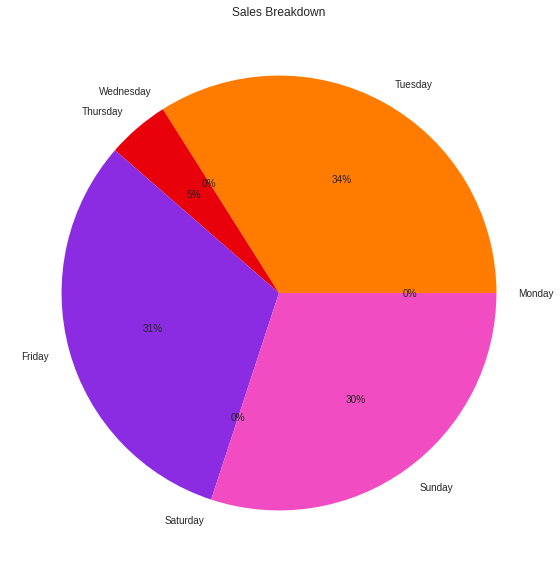

In [ ]:

palette_color = sns.color_palette('bright')
fig = plt.figure(figsize = (10, 10))
plt.pie(day_counter, labels=days, colors=palette_color, autopct='%.0f%%')
plt.title("Sales Breakdown")
plt.show()

In [ ]:
len(data_temp)

4469

In [ ]:
day_counter.sum()

4469.0

In [ ]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_counter2 = np.zeros(7)
#data_temp = data_entire[data_entire['event_type']=='purchase']
for _ in data_entire['Date Time']:
  day_counter2[_.isoweekday()-1]+=1


In [ ]:
for i in range(7):
  print(f'Total events on {days[i]}s are {day_counter2[i]}.')

Total events on Mondays are 0.0.
Total events on Tuesdays are 20286.0.
Total events on Wednesdays are 0.0.
Total events on Thursdays are 2283.0.
Total events on Fridays are 20000.0.
Total events on Saturdays are 0.0.
Total events on Sundays are 20077.0.


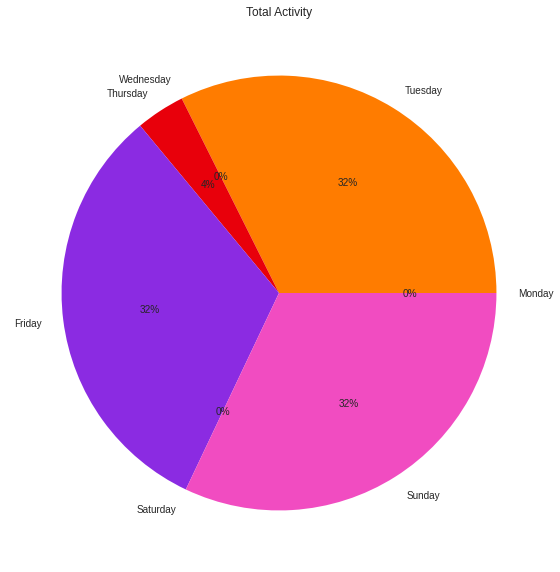

In [ ]:
palette_color = sns.color_palette('bright')
fig = plt.figure(figsize = (10, 10))
plt.pie(day_counter2, labels=days, colors=palette_color, autopct='%.0f%%')
plt.title("Total Activity")
plt.show()

In [ ]:
day_counter2.sum()

62646.0

In [ ]:
interactions = list(data_entire['Date Time'].dt.day.unique())
print(f'The interactions were made only on the dates {interactions}')

The interactions were made only on the dates [1, 31, 24]


In [ ]:
data_temp = data_entire[data_entire['event_type']=='purchase']
data_temp

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Date Time
202,202,2019-10-01 00:06:35 UTC,purchase,5619862,1487580006895846315,not known,runail,5.32,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00
204,204,2019-10-01 00:06:35 UTC,purchase,5619866,1487580006895846315,not known,runail,2.86,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00
205,205,2019-10-01 00:06:35 UTC,purchase,5696184,1487580005134238553,not known,runail,2.38,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00
206,206,2019-10-01 00:06:35 UTC,purchase,5706784,1487580005092295511,not known,runail,4.44,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00
207,207,2019-10-01 00:06:35 UTC,purchase,5723503,1487580005134238553,not known,runail,2.62,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00
...,...,...,...,...,...,...,...,...,...,...,...
61803,19443,2019-12-01 08:07:47 UTC,purchase,5751383,1487580005092295511,not known,uno,10.32,572450208,2793f844-31ec-429b-a736-d85e563e1403,2019-12-01 08:07:47+00:00
61804,19444,2019-12-01 08:07:47 UTC,purchase,5751422,1487580005268456287,not known,uno,10.95,572450208,2793f844-31ec-429b-a736-d85e563e1403,2019-12-01 08:07:47+00:00
62593,3533233,2019-12-31 23:55:23 UTC,purchase,5831578,1487580011677352062,not known,not known,10.95,595413503,3d5af3a2-4a25-48df-b981-b8021915dfe8,2019-12-31 23:55:23+00:00
62615,3533255,2019-12-31 23:57:15 UTC,purchase,5463,1487580009387261981,not known,ingarden,4.92,231690364,63fc9878-efe2-41e3-92b1-9b2deb943bbb,2019-12-31 23:57:15+00:00


In [ ]:
count = np.zeros(len(data_temp["Date Time"].unique()))
cost = np.zeros(len(data_temp["Date Time"].unique()))
for _ in range(len(data_temp["Date Time"].unique())):
  temp = data_temp[data_temp['Date Time']==data_temp["Date Time"].unique()[_]]
  count[_] = len(temp)
  cost[_] = temp['price'].sum()

In [ ]:
count.sum() #=Total Purchases

4469.0

In [ ]:
count

array([ 10.,  35.,  19.,   2.,  46.,   4.,  13.,  12.,   3.,  13.,  22.,
        13.,  10.,  20.,  14.,  29.,  49.,  10.,  15.,  13.,  25.,   4.,
        31.,   9.,   8.,  19.,  24.,  14.,   1.,   9.,  12.,   7.,  11.,
         8.,   3.,  21.,   4.,   3.,   2.,   9.,   4.,   5.,   1.,  23.,
         2.,  10.,  15.,   5.,  16.,   1.,   6.,   8.,   7.,  29.,  10.,
         7.,  11.,  14.,   5.,   9.,  10.,   8.,   1.,   4.,   3.,   7.,
         3.,   1.,  13.,   2.,   1.,  10.,   5.,   8.,   2.,   3.,   3.,
        11.,   6.,   3.,   1.,   2.,   9.,   1.,  13.,   1.,   8.,  13.,
        11.,  12.,   2.,   4.,   3.,  13.,   3.,   3.,  14.,   6.,   5.,
         5.,   9.,  11.,   8.,   7.,   7.,  23.,   5.,  15.,   4.,   4.,
         6.,  30.,   6.,   1.,   7.,   5.,   4.,   1.,  10.,   4.,   1.,
         5.,   1.,   4.,  17.,   3.,   4.,  13.,   2.,   2.,   3.,   1.,
         2.,   6.,   1.,  17.,   7.,   2.,   2.,  29.,   5.,   4.,   1.,
         3.,   6.,  19.,   4.,  24.,  11.,   6.,   

In [ ]:
cost.sum()

22215.700000000004

In [ ]:
cost

array([ 28.34, 105.38,  39.21,  51.43, 205.4 ,  14.89,  39.24,  44.11,
        60.95,  44.18, 115.07,  50.49,  56.28,  53.05, 130.8 , 251.86,
       206.02,  39.  ,  30.8 ,  65.83, 126.35,  67.15,  83.6 ,  30.28,
        53.9 ,  48.02,  44.39,  93.19,  10.32,  68.39,  44.62,  50.  ,
        29.17,  15.3 ,  28.43, 148.48,  24.38,  14.44,   7.94,  69.59,
        15.27,  15.52,  21.56,  60.5 ,   9.76,  46.58,  29.56,  61.9 ,
        47.  ,  19.37,  30.75,  42.88,  54.35,  72.84,  49.19,  30.52,
        57.3 ,  39.32,  70.79,  15.85,  52.42,  24.72,  13.97,  25.59,
        11.86,  34.32,  44.9 ,  47.6 ,  62.52,  86.07,  61.11,  19.13,
        25.16,  94.62,  15.8 ,  41.41,  12.7 ,  53.19,  20.93,  15.06,
        42.7 ,   6.58,  61.12,  10.32,  47.31,  21.59,  31.75,  94.17,
        46.64,  35.61,  11.04,  26.91,  28.25,  38.08,   5.89,  43.5 ,
        48.04,   9.67,  55.62,  26.51,  23.1 ,  73.49,  52.77,  49.9 ,
        50.31,  61.91,  43.34,  33.07,  78.58,  10.15,  79.38,  77.64,
      

In [ ]:
print(f'Maximum number of items purchased together was {count.max()}')
print(f'Maximum money spent at once by a customer was {cost.max()}')
print(f'Minimum number of items purchased together was {count.min()}')
print(f'Minimum money spent at once by a customer was {cost.min()}')
print(f'On average, a customer purchased {count.mean()} items and spent {cost.mean()}')

Maximum number of items purchased together was 148.0
Maximum money spent at once by a customer was 382.01
Minimum number of items purchased together was 1.0
Minimum money spent at once by a customer was 1.52
On average, a customer purchased 9.40842105263158 items and spent 46.76989473684211


In [ ]:
data_entire.nunique()[8]

9619

In [ ]:
print(data_temp["Date Time"].unique()[0])

2019-10-01 00:06:35+00:00


In [ ]:
count.shape

(475,)

In [ ]:
data_temp['price'].sum() # Total Sales

22215.70000000023

In [ ]:
np.array(list(sales[0].values()))

array([629, 343,  89,  89,  51,  47,  37,  36,  29,  27,  25,  24,  18,
        17,  15,  12,  11,  10,  10,   9,   9,   9,   8,   7,   7,   6,
         6,   6,   6,   6,   5,   5,   5,   5,   4,   4,   4,   4,   4,
         4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])

In [ ]:
data_cart = data_entire[data_entire['event_type']=='cart']
data_cart.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Date Time
0,0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,not known,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:00+00:00
1,1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,not known,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:03+00:00
2,2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,not known,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:07+00:00
3,3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,not known,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:07+00:00
4,4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,not known,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:15+00:00


In [ ]:
data_removed = data_entire[data_entire['event_type']=='remove_from_cart']
data_removed.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Date Time
11,11,2019-10-01 00:00:28 UTC,remove_from_cart,5834172,1487580013522845895,not known,runail,0.95,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:28+00:00
12,12,2019-10-01 00:00:30 UTC,remove_from_cart,5809103,1487580013522845895,not known,irisk,0.6,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:30+00:00
13,13,2019-10-01 00:00:30 UTC,remove_from_cart,5809103,1487580013522845895,not known,irisk,0.6,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:30+00:00
14,14,2019-10-01 00:00:32 UTC,remove_from_cart,5779403,1487580013506068678,not known,not known,12.22,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:32+00:00
15,15,2019-10-01 00:00:33 UTC,remove_from_cart,5779403,1487580013506068678,not known,not known,12.22,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:33+00:00


In [ ]:
data_view = data_entire[data_entire['event_type']=='view']
data_view.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Date Time
9,9,2019-10-01 00:00:26 UTC,view,5875317,2029082628195353599,not known,not known,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:00:26+00:00
10,10,2019-10-01 00:00:28 UTC,view,5692917,1487580004857414477,not known,lianail,5.54,555446068,4257671a-efc8-4e58-96c2-3ab457916d78,2019-10-01 00:00:28+00:00
19,19,2019-10-01 00:00:48 UTC,view,5819638,1487580008162526182,not known,not known,21.75,546705258,3b5c65c0-bb1c-453b-b340-4ebf973a3136,2019-10-01 00:00:48+00:00
21,21,2019-10-01 00:00:53 UTC,view,5856191,1487580006350586771,appliances.environment.vacuum,runail,24.44,507355498,944c7e9b-40bd-4112-a05b-81e73f37e0c0,2019-10-01 00:00:53+00:00
39,39,2019-10-01 00:01:11 UTC,view,5733176,1487580009362096156,not known,not known,0.6,543446752,4a01cad9-7368-fd9e-d907-d4d85de0b55c,2019-10-01 00:01:11+00:00


In [ ]:
data_purchased = data_entire[data_entire['event_type']=='purchase']
data_purchased.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Date Time
202,202,2019-10-01 00:06:35 UTC,purchase,5619862,1487580006895846315,not known,runail,5.32,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00
204,204,2019-10-01 00:06:35 UTC,purchase,5619866,1487580006895846315,not known,runail,2.86,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00
205,205,2019-10-01 00:06:35 UTC,purchase,5696184,1487580005134238553,not known,runail,2.38,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00
206,206,2019-10-01 00:06:35 UTC,purchase,5706784,1487580005092295511,not known,runail,4.44,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00
207,207,2019-10-01 00:06:35 UTC,purchase,5723503,1487580005134238553,not known,runail,2.62,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,2019-10-01 00:06:35+00:00


In [ ]:
cart_to_purchase = 0
cart_to_purchase_list = []
cart_to_remove = 0
for i in data_cart['product_id'].unique():
  if i in data_purchased['product_id'].unique():
    cart_to_purchase+=1
    cart_to_purchase_list.append(i)
  if i in data_removed['product_id'].unique():
    cart_to_remove+=1
g = len(data_cart['product_id'].unique())
print(f'Out of {g} unique items that were put in cart {cart_to_purchase} i.e. {cart_to_purchase/g*100}%  were purchased \n and {cart_to_remove} i.e {cart_to_remove/g*100}% were removed from the cart.')

Out of 8359 unique items that were put in cart 2635 i.e. 31.522909438928103%  were purchased 
 and 3939 i.e 47.12286158631415% were removed from the cart.


In [ ]:
data_purchased.nunique()

Unnamed: 0       4202
event_time        475
event_type          1
product_id       3210
category_id       459
category_code       5
brand             130
price             473
user_id           467
user_session      477
Date Time         475
dtype: int64

In [ ]:
data_november.groupby('event_type')

In [ ]:
data_november

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-11-01 00:00:02 UTC,view,5802432.0,1487580009286598912.0,not known,not known,0.32,562076640.0,09fafd6c-6c99-46b1-834f-33527f4de241
1,1,2019-11-01 00:00:09 UTC,cart,5844397.0,1487580006317032448.0,not known,not known,2.38,553329724.0,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2,2019-11-01 00:00:10 UTC,view,5837166.0,1783999064103190784.0,not known,pnb,22.22,556138645.0,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,3,2019-11-01 00:00:11 UTC,cart,5876812.0,1487580010100293632.0,not known,jessnail,3.16,564506666.0,186c1951-8052-4b37-adce-dd9644b1d5f7
4,4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182.0,1487580007483048960.0,not known,not known,3.33,553329724.0,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...,...
20072,3580072,2019-11-24 19:06:47 UTC,cart,5823895.0,1487580007675986944.0,not known,milv,1.19,567933498.0,312fd617-8f5e-4d48-be16-32bb57925d3d
20073,3580073,2019-11-24 19:06:47 UTC,view,5792813.0,1487580005092295424.0,not known,not known,5.16,531698630.0,6cf1afd8-faea-45fd-9a8e-070d83119040
20074,3580074,2019-11-24 19:06:48 UTC,cart,5859742.0,1487580013388628224.0,not known,not known,3.63,436498465.0,c07a5a35-ab87-43d1-89e8-201da67fe533
20075,3580075,2019-11-24 19:06:48 UTC,view,5835755.0,1487580005268456192.0,not known,not known,5.71,553734056.0,d5d3cd21-24fd-41dd-8572-dad89cbb54cb


#Customer Segmentation to analyse customer behaviour

##RFM Analysis


In [ ]:
Latest_Date = np.array(data_purchased['Date Time'])[-1]
type(Latest_Date)

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
RFMScores = data_purchased.groupby('user_id').agg({'Date Time': lambda x:(Latest_Date - x.max()).days,'user_session': lambda x: len(x),'price': lambda x: x.sum()})

In [ ]:
RFMScores['Date Time'] = RFMScores['Date Time'].astype(int)
RFMScores.rename(columns={'Date Time': 'Recency', 
                         'user_session': 'Frequency', 
                         'price': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()
RFMScores2 = RFMScores.copy()

In [ ]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    467.000000
mean      62.961456
std       24.179555
min        0.000000
25%       30.000000
50%       60.000000
75%       91.000000
max       91.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


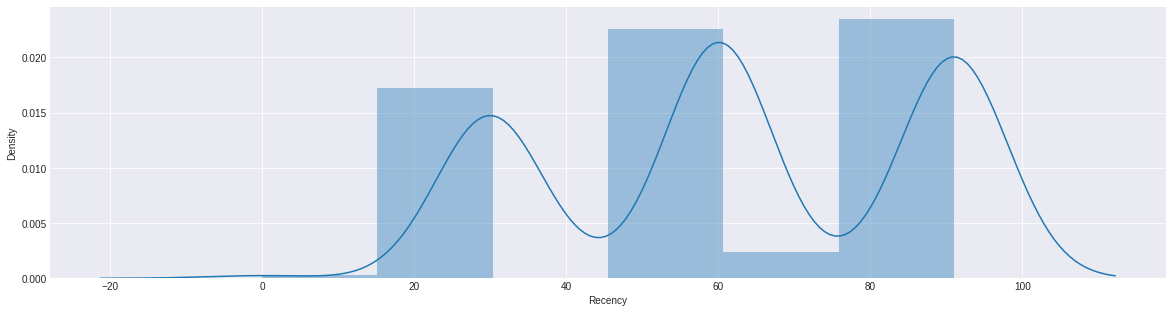

In [ ]:
#Recency distribution plot
x = RFMScores['Recency']
fig = plt.figure(figsize = (20, 5))
ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    467.000000
mean       9.569593
std       11.272330
min        1.000000
25%        3.000000
50%        7.000000
75%       12.000000
max      148.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


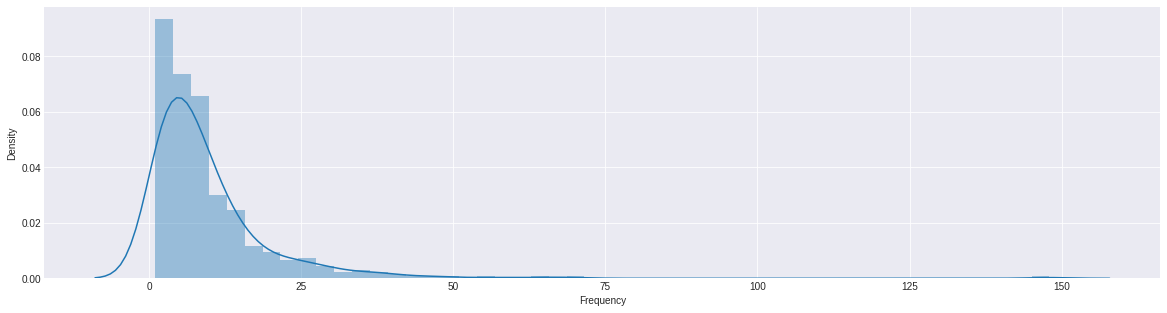

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = RFMScores['Frequency']
fig = plt.figure(figsize = (20, 5))
ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count    467.000000
mean      47.571092
std       45.941573
min        1.520000
25%       19.400000
50%       36.720000
75%       55.855000
max      382.010000
Name: Monetary, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


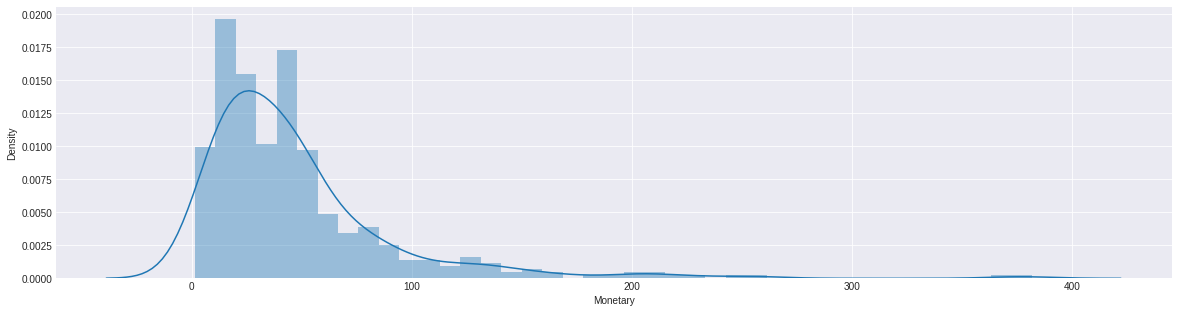

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = RFMScores['Monetary']
fig = plt.figure(figsize = (20, 5))
ax = sns.distplot(x)

Recency was trimodal and hence splitting the data into three categories

In [ ]:
#Split into three segments using quantiles
quantiles = RFMScores.quantile(q=[0.3333,0.6666])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.3333: 60.0, 0.6666: 91.0},
 'Frequency': {0.3333: 4.0, 0.6666: 9.0},
 'Monetary': {0.3333: 24.402245999999998, 0.6666: 47.58178}}

In [ ]:
#Functions to create R, F and M segments
#Lower the value of R the better
#Higher the value of F and M the better
def RScoring(x,p,d):
    if x <= d[p][0.3333]:
        return 1
    elif x <= d[p][0.6666]:
        return 2
    else:
        return 3
    
def FnMScoring(x,p,d):
    if x <= d[p][0.3333]:
        return 3
    elif x <= d[p][0.6666]:
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
user_id,,,,,,
104368191.0,60,4,22.07,1,3,3
115398528.0,30,19,96.09,1,1,1
194804840.0,60,5,39.91,1,2,2
196042408.0,91,3,44.90,2,3,2
224519667.0,60,1,20.00,1,3,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
user_id,,,,,,,,
104368191.0,60,4,22.07,1,3,3,133,7
115398528.0,30,19,96.09,1,1,1,111,3
194804840.0,60,5,39.91,1,2,2,122,5
196042408.0,91,3,44.90,2,3,2,232,7
224519667.0,60,1,20.00,1,3,3,133,7


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 3, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,user_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,104368191.0,60,4,22.07,1,3,3,133,7,Bronze
1,115398528.0,30,19,96.09,1,1,1,111,3,Gold
2,194804840.0,60,5,39.91,1,2,2,122,5,Gold
3,196042408.0,91,3,44.90,2,3,2,232,7,Bronze
4,224519667.0,60,1,20.00,1,3,3,133,7,Bronze


In [ ]:
RFMScores.shape

(467, 9)

Finding the number of Gold, Silver and Bronze Customers

In [ ]:
# counter_loyalty = []
# counter_loyalty.append(len(RFMScores[RFMScores['RFM_Loyalty_Level']=='Gold']))
table = RFMScores.groupby('RFM_Loyalty_Level').agg({"RFM_Loyalty_Level": lambda x: len(x)})

table.rename(columns={'RFM_Loyalty_Level':'Count'}, inplace=True)
table.reset_index().head()

,RFM_Loyalty_Level,Count
0,Gold,251
1,Silver,79
2,Bronze,137


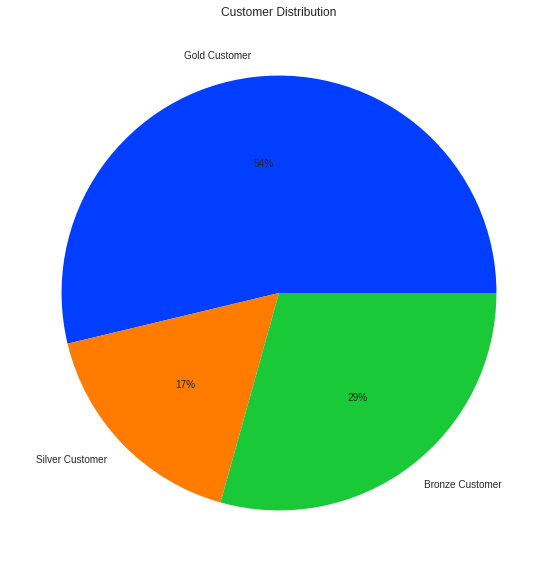

In [ ]:
labels_customers = ['Gold Customer','Silver Customer','Bronze Customer']
palette_color = sns.color_palette('bright')
fig = plt.figure(figsize = (10, 10))
plt.pie(list(table.Count), labels=labels_customers, colors=palette_color, autopct='%.0f%%')
plt.title("Customer Distribution")
plt.show()

Now dividing the customer base into 4 different groups

In [ ]:
#Split into four segments using quantiles
quantiles2 = RFMScores2.quantile(q=[0.25,0.5,0.75])
quantiles2 = quantiles2.to_dict()

In [ ]:
quantiles2

{'Recency': {0.25: 30.0, 0.5: 60.0, 0.75: 91.0},
 'Frequency': {0.25: 3.0, 0.5: 7.0, 0.75: 12.0},
 'Monetary': {0.25: 19.4, 0.5: 36.72, 0.75: 55.855}}

In [ ]:
#Functions to create R, F and M segments
def RScoring2(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring2(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores2['R'] = RFMScores2['Recency'].apply(RScoring2, args=('Recency',quantiles2,))
RFMScores2['F'] = RFMScores2['Frequency'].apply(FnMScoring2, args=('Frequency',quantiles2,))
RFMScores2['M'] = RFMScores2['Monetary'].apply(FnMScoring2, args=('Monetary',quantiles2,))
RFMScores2.head()

,Recency,Frequency,Monetary,R,F,M
user_id,,,,,,
104368191.0,60,4,22.07,2,3,3
115398528.0,30,19,96.09,1,1,1
194804840.0,60,5,39.91,2,3,2
196042408.0,91,3,44.90,3,4,2
224519667.0,60,1,20.00,2,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores2['RFMGroup'] = RFMScores2.R.map(str) + RFMScores2.F.map(str) + RFMScores2.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores2['RFMScore'] = RFMScores2[['R', 'F', 'M']].sum(axis = 1)
RFMScores2.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
user_id,,,,,,,,
104368191.0,60,4,22.07,2,3,3,233,8
115398528.0,30,19,96.09,1,1,1,111,3
194804840.0,60,5,39.91,2,3,2,232,7
196042408.0,91,3,44.90,3,4,2,342,9
224519667.0,60,1,20.00,2,4,3,243,9


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level2 = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts2 = pd.qcut(RFMScores2.RFMScore, q = 4, labels = Loyalty_Level2)
RFMScores2['RFM_Loyalty_Level'] = Score_cuts2.values
RFMScores2.reset_index().head()

,user_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,104368191.0,60,4,22.07,2,3,3,233,8,Silver
1,115398528.0,30,19,96.09,1,1,1,111,3,Platinum
2,194804840.0,60,5,39.91,2,3,2,232,7,Gold
3,196042408.0,91,3,44.90,3,4,2,342,9,Silver
4,224519667.0,60,1,20.00,2,4,3,243,9,Silver


In [ ]:
table2 = RFMScores2.groupby('RFM_Loyalty_Level').agg({"RFM_Loyalty_Level": lambda x: len(x)})

table2.rename(columns={'RFM_Loyalty_Level':'Count'}, inplace=True)
table2.reset_index().head()

,RFM_Loyalty_Level,Count
0,Platinum,179
1,Gold,68
2,Silver,142
3,Bronze,78


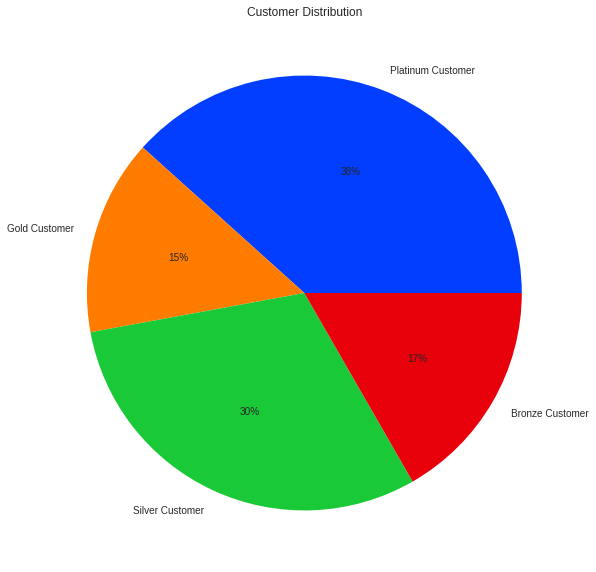

In [ ]:
labels_customers2 = ['Platinum Customer','Gold Customer','Silver Customer','Bronze Customer']
palette_color = sns.color_palette('bright')
fig = plt.figure(figsize = (10, 10))
plt.pie(list(table2.Count), labels=labels_customers2, colors=palette_color, autopct='%.0f%%')
plt.title("Customer Distribution")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(RFMScores2, x='Recency', y='Frequency', z='Monetary',
              color='RFM_Loyalty_Level')
fig.show()

##K Means for Customer Segmentation

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



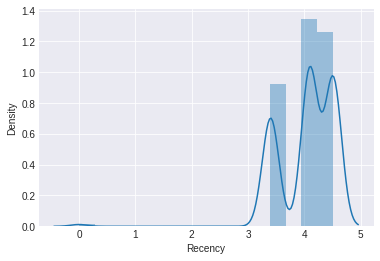

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



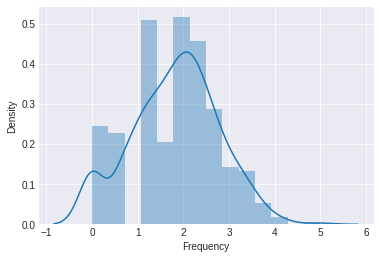

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
ax = sns.distplot(Frequency_Plot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



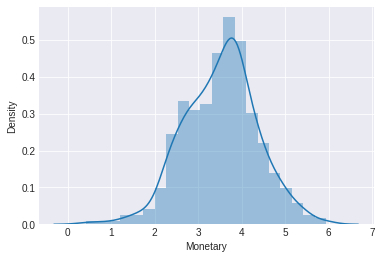

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

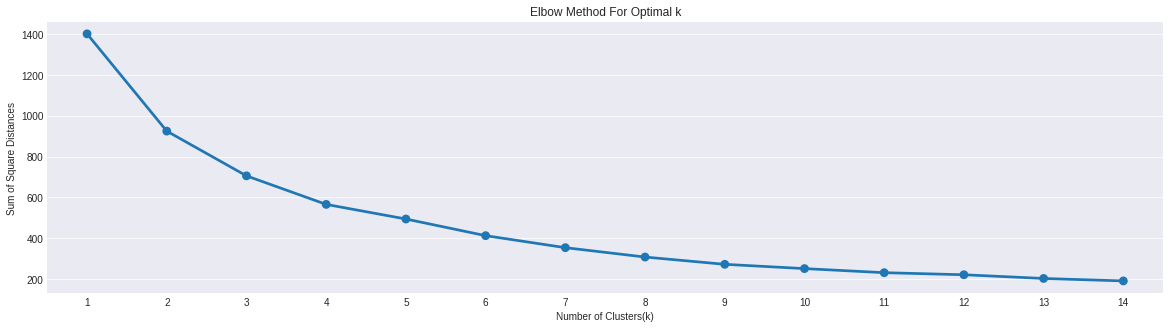

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
fig = plt.figure(figsize = (20, 5))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

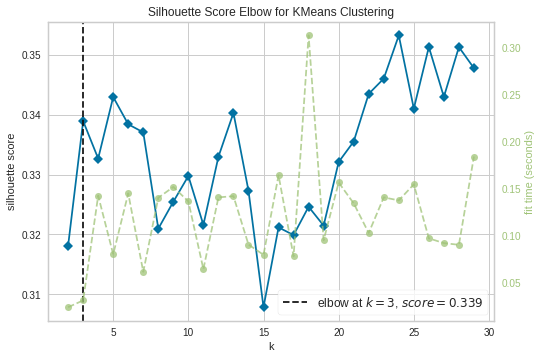

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(Scaled_Data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

 3 is the optimal number of clusters.


In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.tail()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
user_id,,,,,,,,,,
580094927.0,30,5,48.14,1,2,1,121,4,Gold,0
580100376.0,30,7,34.92,1,2,2,122,5,Gold,0
580103208.0,30,9,55.31,1,2,1,121,4,Gold,0
580103296.0,30,3,10.08,1,3,3,133,7,Bronze,2
595413503.0,1,1,10.95,1,3,3,133,7,Bronze,0


In [ ]:

plt.figure(figsize=(10,7))


Colors = ['A','B','C']
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])

import plotly.express as px
fig = px.scatter_3d(RFMScores, x='Recency', y='Frequency', z='Monetary',
              color='Color')
fig.show()

<Figure size 720x504 with 0 Axes>